# Clasificación GBC

In [1]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, log_loss, recall_score, plot_confusion_matrix,classification_report, f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Importamos los datos
datos = ['../data/RD_GBC_0', '../data/RD_GBC_1', '../data/RD_GBC_2', '../data/RD_GBC_3', '../data/RD_GBC_4',
        '../data/RD_GBC_5', '../data/RD_GBC_6', '../data/RD_GBC_7', '../data/RD_GBC_8', '../data/RD_GBC_9']
df = pd.DataFrame()

for path in datos:
    df_i = pd.read_csv(path)
    df = pd.concat([df, df_i])
    
df.shape

(512000, 18)

In [3]:
df.head()

,pT_j1,m_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrones_j1,pT_j2,m_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrones_j2,m_jj,deltaR_j12,n_hadrones,label
0,1286.727685,106.912129,0.185508,-2.763676,1313.290435,0.624659,36,1283.220733,63.164215,0.064989,0.393688,1287.481934,0.713248,33,170.076344,3.159663,109.0,0.0
1,1354.394070,614.269108,0.826505,1.365524,1943.559886,0.311688,84,1325.613761,439.064150,-0.874319,-1.786248,1916.370744,0.276881,97,1053.333258,3.581406,208.0,0.0
2,1214.955723,645.865619,-0.196786,2.040545,1396.840654,0.238205,119,1072.462085,113.768840,0.143831,-1.090330,1089.530630,0.726963,59,759.634459,3.149348,196.0,0.0
3,1285.227873,516.835248,0.328693,2.975321,1450.485926,0.013429,65,1220.251279,174.796077,0.294854,-0.322661,1285.618789,0.706361,89,691.631325,3.298155,183.0,0.0
4,1210.415787,129.499352,-0.744836,-2.883347,1567.345300,0.423550,54,1091.785816,155.362262,1.060534,0.264977,1772.340209,0.787662,57,284.861613,3.629229,169.0,1.0


In [4]:
#df = pd.read_csv('../data/eventosRD_100000.csv')

Separamos la data en un conjunto de datos de entrenamiento y un conjunto de datos de prueba:

In [5]:
# Definimos una función para separar un dataframe en caracteristicas y label

def data_ready(df, label='label'):
    
    # Creamos una lista con las características a considerar en el modelo
    carac_cols = df.columns.values.tolist()
    
    # Eliminamos 'label' porque no es una característica
    carac_cols.remove(label)

    # Hacemos un dataframe solo con las características
    X = df[carac_cols]

    # Obtenemos la serie con la información sobre señal o fondo
    y = df[label]
    
    return X, y

In [6]:
lb = LabelBinarizer()
df['label'] = lb.fit_transform(df['label'].values)
X, y = data_ready(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Vemos que la distribución de clases coincida en ambos datos

In [7]:
print('y_train class distribution')
print(y_train.value_counts(normalize=True))

print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
0    0.908714
1    0.091286
Name: label, dtype: float64
y_test class distribution
0    0.908711
1    0.091289
Name: label, dtype: float64


## Clasificación
Definimos el clasificador, lo entrenamos y hacemos las predicciones

In [8]:
clf = GradientBoostingClassifier()
nombre = clf.__class__.__name__

clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

Obtenemos métricas de acuerdo a la clasificación:

In [9]:
print(classification_report(y_test, y_pred, target_names=['fondo','señal']))

              precision    recall  f1-score   support

       fondo       0.98      0.99      0.98    139578
       señal       0.90      0.76      0.82     14022

    accuracy                           0.97    153600
   macro avg       0.94      0.87      0.90    153600
weighted avg       0.97      0.97      0.97    153600



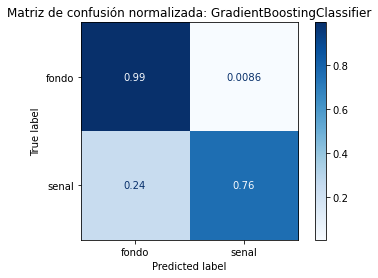

In [10]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['fondo','senal'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title("Matriz de confusión normalizada: {}".format(nombre))
plt.show()

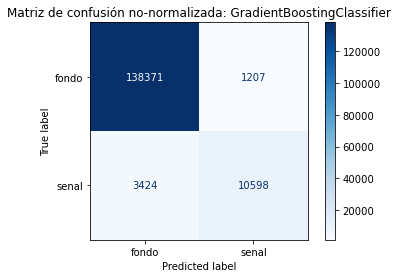

In [11]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=['fondo','senal'],
                             cmap=plt.cm.Blues,
                             normalize=None)

disp.ax_.set_title("Matriz de confusión no-normalizada: {}".format(nombre))

plt.show()

In [12]:
precision = precision_score(y_test, y_pred)
ll = log_loss(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

print("Precision: {} \n Log score: {:.4f} \n F1 score: {:.4f}".format(precision ,ll, f1))

Precision: 0.8977551884794579 
 Log score: 0.0876 
 F1 score: 0.8207


In [13]:
fi_gb = clf.feature_importances_.tolist()
peso = [ round(elem, 3) for elem in fi_gb ]
features = X_train.columns.tolist()
scores = list(zip(features, peso))
scores

[('pT_j1', 0.045),
 ('m_j1', 0.075),
 ('eta_j1', 0.0),
 ('phi_j1', 0.0),
 ('E_j1', 0.0),
 ('tau_21_j1', 0.063),
 ('nhadrones_j1', 0.003),
 ('pT_j2', 0.058),
 ('m_j2', 0.058),
 ('eta_j2', 0.0),
 ('phi_j2', 0.0),
 ('E_j2', 0.0),
 ('tau_21_j2', 0.045),
 ('nhadrones_j2', 0.002),
 ('m_jj', 0.279),
 ('deltaR_j12', 0.016),
 ('n_hadrones', 0.355)]

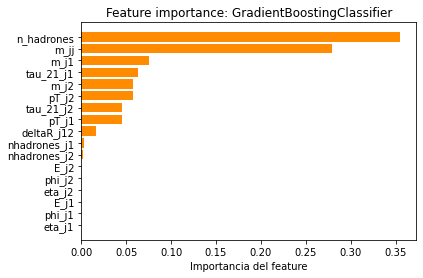

In [14]:
# Ordenamos de menor a mayor
scores.sort(key=lambda x: x[1], reverse=False) 

# Salvamos los nombres y su puntaje separados
# y revertimos las tuplas para tener de mayor a menor puntaje  
features = list(zip(*scores))[0]
score = list(zip(*scores))[1]
x_pos = np.arange(len(features)) 

# Graficamos
plt.barh(x_pos, score,align='center', color = 'darkorange')
plt.yticks(x_pos, features) 
plt.xlabel('Importancia del feature')
plt.title('Feature importance: {}'.format(nombre))
plt.show()

## ROC y AUC
Graficamos la curva ROC y obtenemos el puntaje AUC

In [15]:
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib

fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_proba[:, 1])

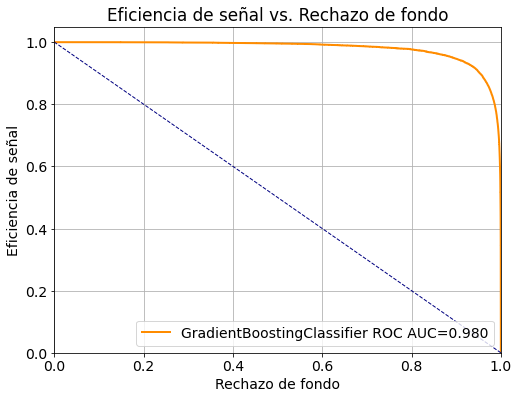

In [17]:
plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()

plt.plot(1-fpr, tpr, color='darkorange', lw=2,
         label='{} ROC AUC={:.3f}'.format(nombre, roc_auc))


plt.plot([1, 0], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rechazo de fondo')
plt.ylabel('Eficiencia de señal')
plt.title('Eficiencia de señal vs. Rechazo de fondo')
plt.show()

<ipython-input-18-19eb22cb2463>:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr, 1/fpr, color='darkorange', lw=2,


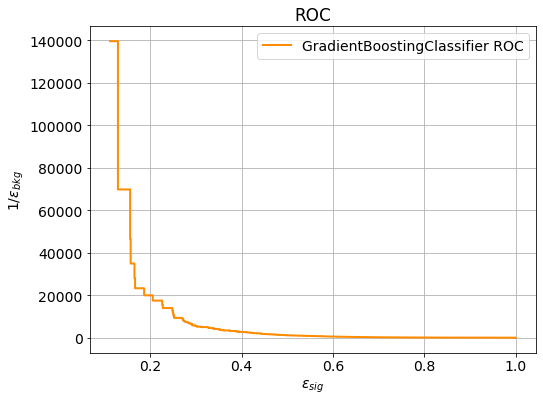

In [18]:
plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()

plt.plot(tpr, 1/fpr, color='darkorange', lw=2,
         label='{} ROC'.format(nombre))


plt.legend(loc="upper right")
plt.xlabel('$\epsilon_{sig}$')
plt.ylabel('$1/\epsilon_{bkg}$')
plt.title('ROC')
plt.show()

Hacemos plots de las distribuciones **después de la clasificación**

In [19]:
def plot_comp(df, variable, jets = 'principales', n_bins=50, log=False):
    pred_fondo = df[df['y_pred'] == 0]
    pred_sig = df[df['y_pred'] == 1]

    fondo = df[df['y_test'] == 0]
    sig = df[df['y_test'] == 1]
    
    fondopred = pred_fondo[variable]
    senalpred = pred_sig[variable]

    fondo = fondo[variable]
    senal = sig[variable]
    
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    titulo = 'Distribución de {}'.format(variable)
    
    # Hacemos los histogramas
    
    if type(fondo)==list:
        plt.hist(fondopred, bins=n_bins, histtype='step', log=log, color='green', label='fondo pred', density=True)
        plt.hist(senalpred, bins=n_bins, histtype='step', log=log, color='orange', label='señal pred', density=True)
        
        plt.hist(fondo, bins=n_bins, log=log, facecolor='blue', alpha=0.2, label='green', density=True)
        plt.hist(senal, bins=n_bins, log=log, facecolor='red', alpha=0.2, label='señal', density=True)
        
    else:
        fondopred.plot.hist(bins=n_bins, histtype='step', log=log, color='green', label='fondo pred', density=True)
        senalpred.plot.hist(bins=n_bins, histtype='step', log=log, color='orange', label='señal pred', density=True)
        
        fondo.plot.hist(bins=n_bins, log=log, facecolor='blue', alpha=0.2, label='fondo', density=True)
        senal.plot.hist(bins=n_bins, log=log, facecolor='red', alpha=0.2, label='señal', density=True)

    # Agregamos información al gráfico
    plt.xlabel(variable)
    plt.ylabel('Densidad de eventos')
    plt.legend(loc='upper right')
    plt.title(titulo)
    
    return plt.show()

In [20]:
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test

X_test.head()

<ipython-input-20-9fc5ce7d062b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred'] = y_pred
<ipython-input-20-9fc5ce7d062b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_test'] = y_test


,pT_j1,m_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrones_j1,pT_j2,m_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrones_j2,m_jj,deltaR_j12,n_hadrones,y_pred,y_test
7704,1245.335366,589.122521,-0.591652,2.566940,1583.408925,0.252553,100,1113.805169,61.245864,0.801365,-0.797360,1492.250629,0.301229,31,650.368385,3.641292,191.0,0,0
13843,1490.167755,123.532076,0.163960,0.372214,1515.286474,0.709907,39,1419.495073,60.903034,0.001545,-2.751416,1420.802678,0.440108,27,184.435110,3.127850,109.0,0,0
44955,1436.961210,101.657847,-0.488022,0.427252,1614.704990,0.620576,31,1061.226122,282.394158,0.430838,-2.555102,1195.095384,0.343264,88,384.052005,3.120696,195.0,0,0
6850,1261.358720,218.808374,1.172695,1.354259,2243.439433,0.726776,51,1201.313206,287.944492,-1.255317,-1.732465,2296.971844,0.347862,112,506.752866,3.927227,234.0,0,0
44215,1300.249334,232.676144,0.123892,2.329810,1330.740280,0.933545,64,1224.618066,150.389562,-0.065651,-0.714245,1236.438223,0.409710,42,383.065706,3.049950,183.0,0,0


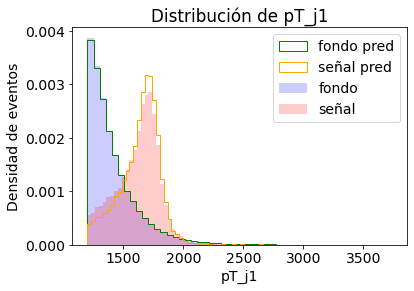

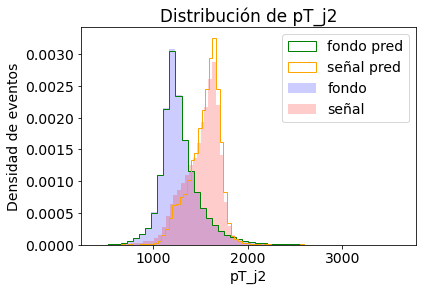

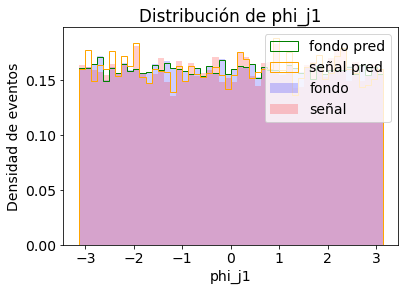

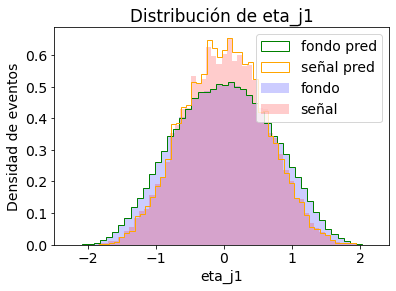

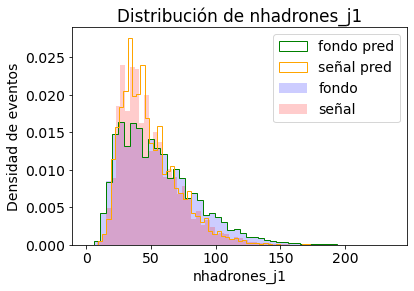

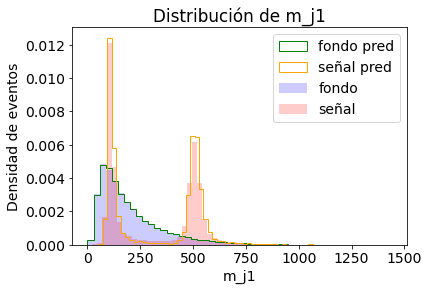

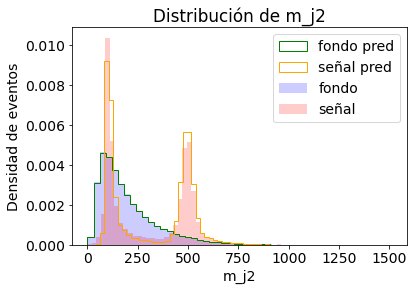

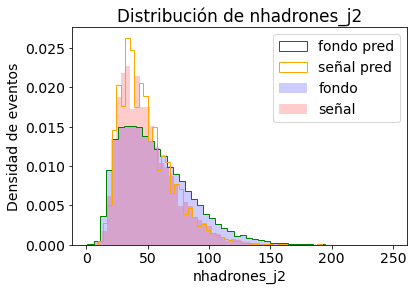

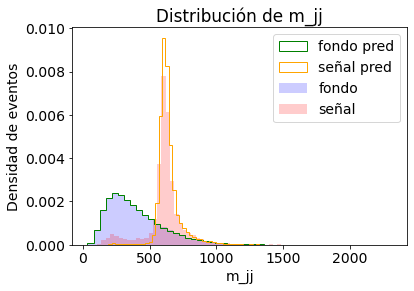

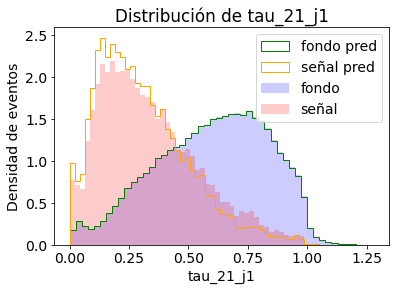

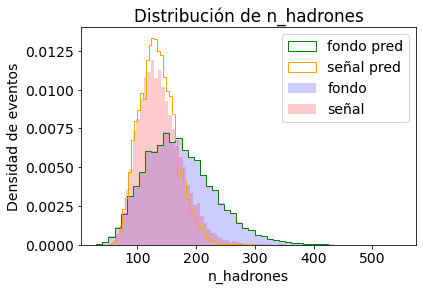

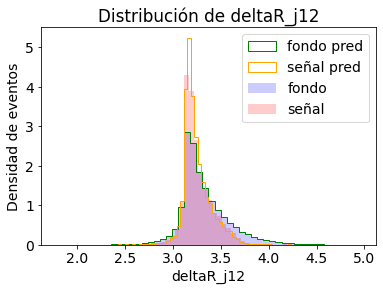

In [21]:
lista = ['pT_j1', 'pT_j2', 'phi_j1', 'eta_j1', 'nhadrones_j1',  
         'm_j1', 'm_j2', 'nhadrones_j2', 'm_jj','tau_21_j1', 
         'n_hadrones', 'deltaR_j12']

for variable in lista:
        plot_comp(X_test, variable)